# 📚 NLP (Natural Language Processing) with Python

***


# 📝 Agenda

> 1. Representing text as numerical data
> 2. Reading a text-based dataset into pandas
> 3. Vectorizing our dataset
> 4. Building and evaluating a model
> 5. Comparing models
> 6. Examining a model for further insight
> 7. Practicing this workflow on another dataset
> 8. Tuning the vectorizer (discussion)

---

# 1. NLP?
* 기계가 자연어를 이해하고 해석하여 처리할 수 있도록 하는 일
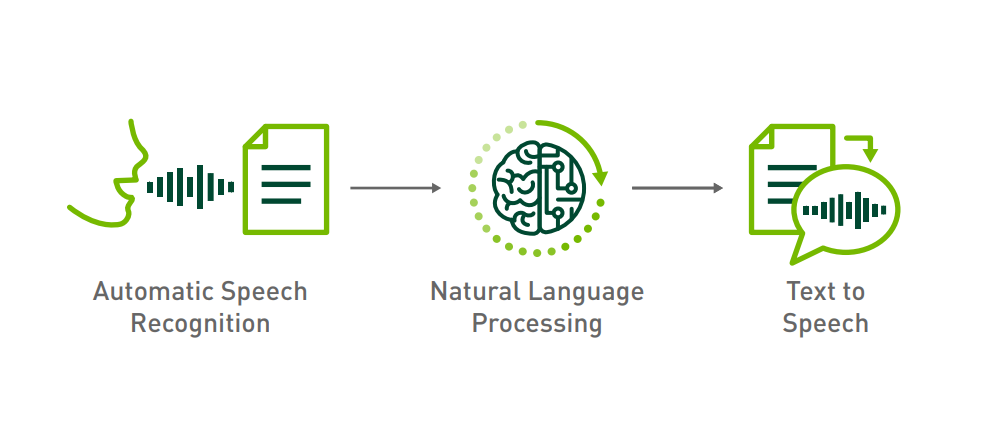

# 2. NLP 활용 분야
* 텍스트 분류
* 감성 분석
* 텍스트 요약
* 텍스트 군집화
* 기계 번역
* 대화 시스템 및 자동 질의 응답 시스템

# 3. NLP 처리 프로세스
* 1) 텍스트 전처리
* 2) 피처 벡터화
* 3) 머신러닝 모델링
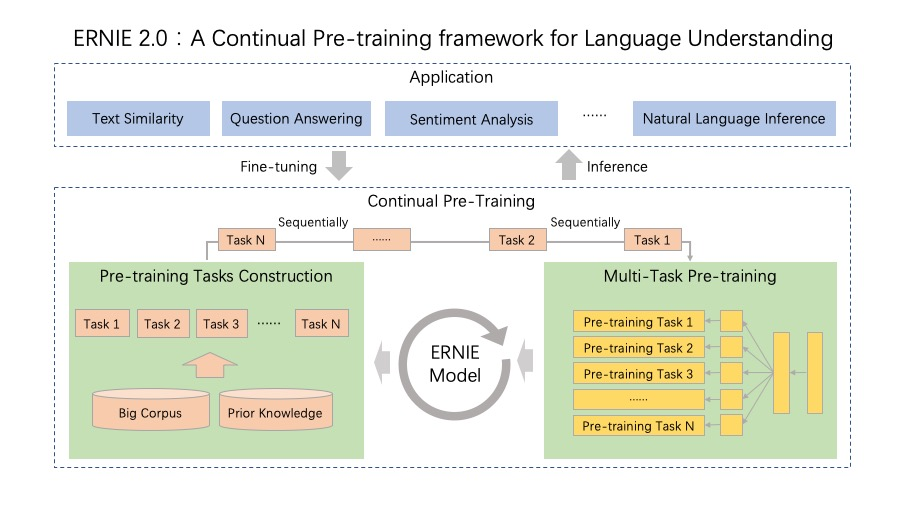

# 4. NLP 라이브러리
* NLTK(National Language Toolkit for Python): https://www.nltk.org/
* Gensim: https://radimrehurek.com/gensim/
* SpaCy: https://spacy.io/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 🔁 Representing text as numerical data

In [ ]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [ ]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

In [ ]:
# examine the fitted vocabulary
vect.get_feature_names()

In [ ]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

In [ ]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

In [ ]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

In [ ]:
# check the type of the document-term matrix
type(simple_train_dtm)

In [ ]:
# examine the sparse matrix contents
print(simple_train_dtm)

In [ ]:
# example text for model testing
simple_test = ["please don't call me"]

In [ ]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

In [ ]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

# 💾 Reading a text-based dataset into pandas

In [ ]:
# read file into pandas using a relative path
sms = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

# 🔍 Exploratory Data Analysis (EDA)

In [ ]:
sms.describe()

In [ ]:
sms.groupby('label').describe()

We have `4825` ham message and `747` spam message

In [ ]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

In [ ]:
sms['message_len'] = sms.message.apply(len)
sms.head()

In [ ]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
sms[sms.label=='ham'].describe()

In [ ]:
sms[sms.label=='spam'].describe()

In [ ]:
sms[sms.message_len == 910].message.iloc[0]

# 📑 Text Pre-processing

In [ ]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
sms.head()

In [ ]:
sms['clean_msg'] = sms.message.apply(text_process)

In [ ]:
sms.head()

In [ ]:
type(stopwords.words('english'))

In [ ]:
from collections import Counter

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

In [ ]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

# 🧮 Vectorization

In [ ]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print(X.shape)
print(y.shape)

In [ ]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

In [ ]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

In [ ]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [ ]:
# examine the document-term matrix
X_train_dtm

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

# 🤖 Building and evaluating a model

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
X_test.shape

In [ ]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

In [ ]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

In [ ]:
# example of false negative 
X_test[4949]

In [ ]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

In [ ]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

# 📊 Comparing models

We will compare multinomial Naive Bayes with [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [ ]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [ ]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [ ]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

In [ ]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

# 🧮 Tuning the vectorizer

In [ ]:
# show default parameters for CountVectorizer
vect

In [ ]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
vect

In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
vect

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)
vect

In [ ]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)
vect